<a href="https://colab.research.google.com/github/CanopySimulations/canopy-python-examples/blob/master/loading_vector_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upgrade Runtime
This cell ensures the runtime supports `asyncio` async/await, and is needed on Google Colab. If the runtime is upgraded, you will be prompted to restart it, which you should do before continuing execution.

In [0]:
!pip install "ipython>=7"

# Set Up Environment

### Import required libraries

In [0]:
!pip install -q 'canopy==6.1'

In [0]:
import canopy
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

### Authenticate

In [0]:
authentication_data = canopy.prompt_for_authentication()

def create_session():
    return canopy.Session(authentication_data)

# Set Up Example

Run a quick ApexSim exploration.

In [4]:
async with create_session() as session:
    logging.info('Loading configs...')

    default_car = await canopy.load_default_config(
        session, 'car', 'Canopy F1 Car 2019')
    
    default_weather = await canopy.load_default_config(
        session, 'weather', '25 deg, dry')
    
    default_exploration = await canopy.load_default_config(
        session, 'exploration', 'Automated Test Monte Carlo')

    # We'll run a very small exploration for this example
    default_exploration.data.design.numberOfPoints = 3

    logging.info('Creating study...')

    study_id = await canopy.create_study(
        session,
        'apexSim',
        'Loading Vector Results Example',
        [
            default_car,
            default_weather,
            default_exploration,
        ])
    
    logging.info('Waiting for study to complete...')

    wait_result = await canopy.wait_for_study(
        session,
        study_id,
        timeout_seconds=300)
    
logging.info('Sim Version: {}'.format(wait_result.document.sim_version))    
logging.info('Succeded Job Count: {}/{}'.format(
    wait_result.data.succeeded_job_count, 
    wait_result.data.job_count))

INFO:root:Loading configs...
INFO:root:Creating study...
INFO:root:Waiting for study to complete...
INFO:root:Sim Version: 1.3037
INFO:root:Succeded Job Count: 4/4


# Example: Loading Vector Results

## Loading for a single job
We can load the vector results for an individual job by passing a list of channel names to the `load_study_job` function. Note we are specifically loading the `ApexSim` vector results here. If we also wanted the `StraightSim` results we can fetch them in a second call.

In [7]:
async with create_session() as session:
    job_0 = await canopy.load_study_job(
        session,
        study_id,
        'ApexSim',
        job_index=0,
        channel_names=[
            'vCar',
            'hRideF',
            'hRideR'
        ])
    
job_0.vector_data

INFO:canopy.load_study_job:Loading job index 0


,vCar,hRideF,hRideR
0,9.893272,0.025789,0.144188
1,11.928443,0.025335,0.144089
2,13.962837,0.024596,0.143761
3,15.980338,0.023980,0.143397
4,17.987581,0.023384,0.142995
5,19.988905,0.022777,0.142553
6,21.986698,0.022162,0.142056
7,23.982662,0.021558,0.141449
8,25.979435,0.021114,0.140468
9,27.974327,0.020427,0.139764


We can request individual vector results in our desired units:

In [8]:
job_0.vector_as('hRideF', 'mm')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


0     25.788593
1     25.335253
2     24.595997
3     23.979742
4     23.384085
5     22.776691
6     22.162256
7     21.557619
8     21.114399
9     20.427200
10    19.693329
11    18.926970
12    18.132900
13    17.323288
14    16.509192
15    15.759773
16    14.961820
17    14.098916
18    13.184711
19    12.238319
20    11.261050
21    10.262146
22     9.287554
23     8.222528
24     7.127662
25     6.003813
26     4.852275
27     3.709162
28     2.517660
29     1.283526
30     0.018313
31    -1.278172
32    -2.581558
33    -3.942634
34    -5.342009
35    -6.782011
36    -8.243492
37    -9.772438
38   -11.335172
39   -12.736754
40   -13.332184
Name: hRideF, dtype: float32

You can also use the `vector_as` function and omit the units, which will then use the preferred units saved in your Canopy account:

In [9]:
job_0.vector_as('hRideF')

0     0.025789
1     0.025335
2     0.024596
3     0.023980
4     0.023384
5     0.022777
6     0.022162
7     0.021558
8     0.021114
9     0.020427
10    0.019693
11    0.018927
12    0.018133
13    0.017323
14    0.016509
15    0.015760
16    0.014962
17    0.014099
18    0.013185
19    0.012238
20    0.011261
21    0.010262
22    0.009288
23    0.008223
24    0.007128
25    0.006004
26    0.004852
27    0.003709
28    0.002518
29    0.001284
30    0.000018
31   -0.001278
32   -0.002582
33   -0.003943
34   -0.005342
35   -0.006782
36   -0.008243
37   -0.009772
38   -0.011335
39   -0.012737
40   -0.013332
Name: hRideF, dtype: float32

We can then easily plot the results:

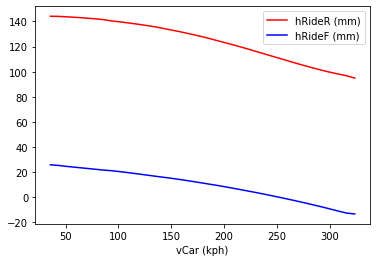

In [13]:
x = job_0.vector_as('vCar', 'kph')

plt.figure()
plt.xlabel('vCar (kph)')
plt.plot(x, job_0.vector_as('hRideR', 'mm'), 'r-', label='hRideR (mm)')
plt.plot(x, job_0.vector_as('hRideF', 'mm'), 'b-', label='hRideF (mm)')
plt.legend()
plt.show()

## Loading for an entire study

We can load the scalar results for the entire study by passing a list of channels to the `load_study` function.

We'll also load the study scalar results for context.

In [22]:
async with create_session() as session:
    study = await canopy.load_study(
        session,
        study_id,
        'ApexSim',
        channel_names=[
            'vCar',
            'hRideF',
            'hRideR'
        ],
        include_study_scalar_results=True)

INFO:canopy.load_study_job:Loading job index 0
INFO:canopy.load_study_job:Loading job index 1
INFO:canopy.load_study_job:Loading job index 2


0
1
2


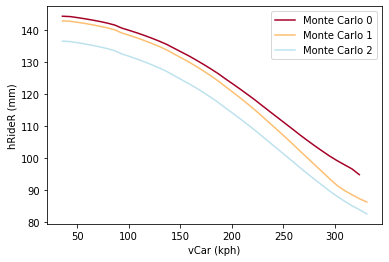

In [27]:
plt.figure()
plt.xlabel('vCar (kph)')
plt.ylabel('hRideR (mm)')

for index, job in enumerate(study.jobs):
    print(index)
    plt.plot(
        job.vector_as('vCar', 'kph'),
        job.vector_as('hRideR', 'mm'),
        label=job.document.name,
        color=plt.cm.RdYlBu(index / (study.data.job_count - 1)))
plt.legend()
plt.show()

If we want to understand exactly what changed for these three jobs to produce these results, we can look at the scalar results:

In [23]:
study.scalar_results.inputs

,car.chassis.carRunningMass.mCar+,car.chassis.ICar+,car.chassis.hRideFSetup+,car.chassis.hRideRSetup+
0,8.339320,"[7.50897989026,0.0,0.0,0.0,15.01795978052,0.0,...",0.002229,0.018876
1,6.534816,"[4.80222360454,0.0,0.0,0.0,9.60444720908,0.0,0...",0.008744,0.017424
2,-9.913098,"[-19.86964737989,0.0,0.0,0.0,-39.73929475978,0...",0.002847,0.011191
